# **Decision Tree Regression**

A decision tree is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

DTs algorithms are perfect to solve classification (where machines sort data into classes, like whether an email is spam or not) and regression (where machines predict values, like a property price) problems. Regression Trees are used when the dependent variable is continuous or quantitative (e.g. if we want to estimate the probability that a customer will default on a loan), and Classification Trees are used when the dependent variable is categorical or qualitative (e.g. if we want to estimate the blood type of a person).

<img src = 'p_img.png'>

<img src = 'o_img.png'  width="600" height="400">

Decision Trees are divided into Classification and Regression Trees. Regression trees are needed when the response variable is numeric or continuous. Classification trees, as the name implies are used to separate the dataset into classes belonging to the response variable. 

<img src='a_img.png'>

**Decision Tree Regression:**

<img src='c_img.png'  width="600" height="400">

<img src='n_img.png'>

**Decision Tree Classification:**

<img src='e_img.png' width="600" height="400">

## **The Fundamentals of Decision Trees**

A decision tree is constructed by **recursive partitioning** — starting from the root node (known as the first parent), each node can be split into left and right child nodes. These nodes can then be further split and they themselves become parent nodes of their resulting children nodes.

<img src = 'f_img.png'  width="700" height="600">

For example, looking at the image above, the root node is **Work to do?** and splits into the child nodes **Stay in** and **Outlook** based on whether or not there is work to do. The **Outlook** node further splits into three child nodes.

So, how do we know what the optimal splitting point is at each node?

Starting from the root, the data is split on the feature that results in the largest **Information Gain (IG)**. In an iterative process, we then repeat this splitting procedure at each **child node** until the leaves are pure — i.e. samples at each node all belong to the same class.

``In practice, this can result in a very deep tree with many nodes, which can easily lead to overfitting. Thus, we typically want to prune the tree by setting a limit for the maximal depth of the tree.``

## **Maximizing Information Gain**

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. Here, our objective function is to maximize the information gain at each split, which we define as follows:

<img src='g_img.png'>

Here, f is the feature to perform the split, Dp, Dleft, and Dright are the datasets of the parent and child nodes, I is the **impurity measure**, Np is the total number of samples at the parent node, and Nleft and Nright are the number of samples in the child nodes.

Just understand that information gain is simply the difference between the impurity of the parent node and the sum of the child node impurities — the lower the impurity of the child nodes, the larger the information gain.

Note that the above equation is for binary decision trees — each parent node is split into two child nodes only. If you have a decision tree with multiple nodes, you would simply sum the impurity of all nodes.

## **How Do Decision Trees Work?**

There are several steps involved in the building of a decision tree.

### **1. Splitting**

The process of partitioning the data set into subsets. Splits are formed on a particular variable

<img src = 'j_img.png'>

### **2. Pruning**

The shortening of branches of the tree. Pruning is the process of reducing the size of the tree by turning some branch nodes into leaf nodes, and removing the leaf nodes under the original branch. Pruning is useful because classification trees may fit the training data well, but may do a poor job of classifying new values. A simpler tree often avoids over-fitting.

<img src = 'k_img.png'>

As you can see, a pruned tree has less nodes and has less sparsity than a unpruned decision tree.

### **3. Tree Selection**

The process of finding the smallest tree that fits the data. Usually this is the tree that yields the lowest cross-validated error.

<hr>

## **Random Forest**

The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees (which we could call a “forest”), this model uses two key concepts that gives it the name random:

*    Random sampling of training data points when building trees
*    Random subsets of features considered when splitting nodes

<img src = 'm_img.png'>

## **How do Random Forests work?**

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

<img src = 'l_img.png'>

## **Types of Ensemble Learning:**

*    Boosting.
*    Bootstrap Aggregation (Bagging).

**1. Boosting**

Boosting refers to a group of algorithms that utilize weighted averages to make weak learners into stronger learners. Boosting is all about “teamwork”. Each model that runs, dictates what features the next model will focus on.

In boosting as the name suggests, one is learning from other which in turn boosts the learning.

**2. Bootstrap Aggregation (Bagging)**

Bootstrap refers to random sampling with replacement. Bootstrap allows us to better understand the bias and the variance with the dataset. Bootstrap involves random sampling of small subset of data from the dataset.

It is a general procedure that can be used to reduce the variance for those algorithm that have high variance, typically decision trees. Bagging makes each model run independently and then aggregates the outputs at the end without preference to any model.

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.

Random forest is a bagging technique and not a boosting technique. The trees in random forests are run in parallel. There is no interaction between these trees while building the trees.

It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## **Problems with Decision Trees**

Decision trees are sensitive to the specific data on which they are trained. If the training data is changed the resulting decision tree can be quite different and in turn the predictions can be quite different.

Also Decision trees are computationally expensive to train, carry a big risk of overfitting, and tend to find local optima because they can’t go back after they have made a split.



# **Practice using Graduate Admissions Dataset**
Dataset ini dibuat oleh Mohan S Acharya untuk memperkirakan peluang penerimaan lulusan dari perspektif India. Analisis kami akan membantu kami dalam memahami faktor-faktor apa yang penting dalam penerimaan lulusan dan bagaimana faktor-faktor ini saling terkait satu sama lain. Ini juga akan membantu memprediksi peluang seseorang untuk masuk mengingat variabel-variabel lainnya.

### **Import Library**

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **Open Dataset**

In [26]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### **Drop Irrelevant Feature**

In [27]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### **Visualize Features**

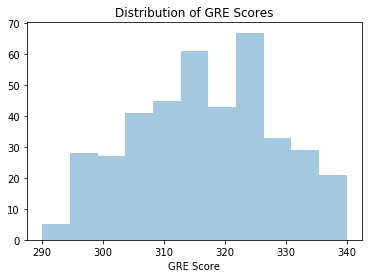

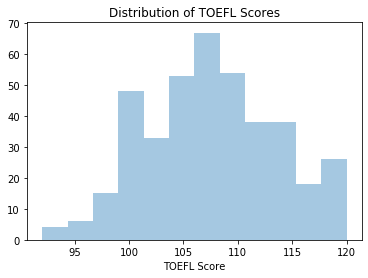

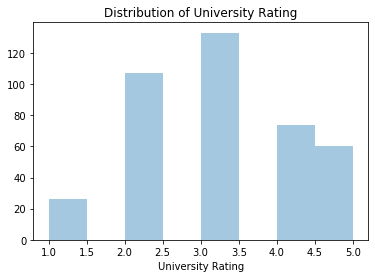

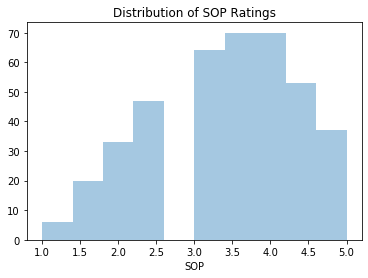

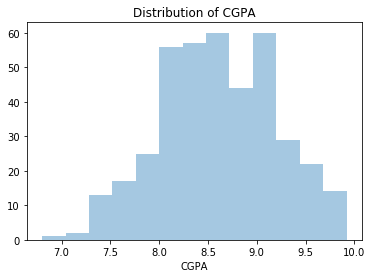

In [28]:
fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

### **Correlation**

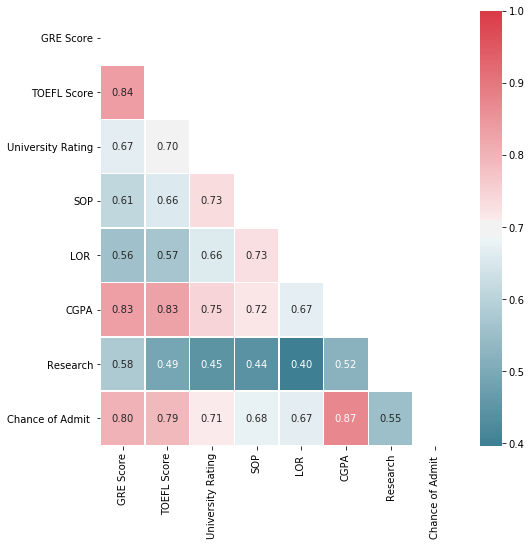

In [23]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

### **Spliting Dataset**

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

### **Import Regression Models**

In [35]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


models = [
    ['Linear Regression :', LinearRegression()],
    ['ElasticNet: ', ElasticNet()],
    ['Lasso: ', Lasso()],
    ['Ridge: ', Ridge()],
    ['DecisionTree :',DecisionTreeRegressor()],
    ['RandomForest :',RandomForestRegressor()],
    
    ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
    ['SVM :', SVR()],
    ['AdaBoostClassifier :', AdaBoostRegressor()],
    ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
    ['BayesianRidge: ', BayesianRidge()],
    ['HuberRegressor: ', HuberRegressor()]]

### **Fitting, Predict, & Evaluating Models**

In [37]:
for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('RMSE Score',name, (np.sqrt(mean_squared_error(y_test, predictions))))

RMSE Score Linear Regression : 0.06473311695782087
RMSE Score ElasticNet:  0.09805987388222617
RMSE Score Lasso:  0.1313765707596043
RMSE Score Ridge:  0.06479970981992428
RMSE Score DecisionTree : 0.09220222340052327
RMSE Score RandomForest : 0.07262587779159711
RMSE Score KNeighbours : 0.083342291185208
RMSE Score SVM : 0.08180727044650482
RMSE Score AdaBoostClassifier : 0.08152433516590435
RMSE Score GradientBoostingClassifier:  0.06649558972395066
RMSE Score BayesianRidge:  0.06489639576721208
RMSE Score HuberRegressor:  0.06892036516361924


### **Feature Importance**

In [31]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

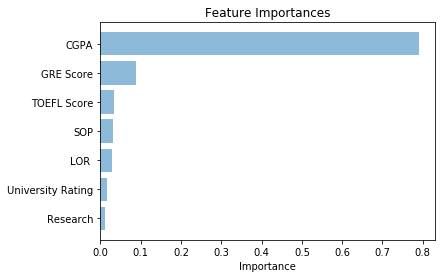

In [32]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## **Reference**:

* Samet Girgin, "Decision Tree Regression in 6 Steps with Python", https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16
* Lorraine Li, "Classification and Regression Analysis with Decision Trees", https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054
* Diego Lopez Yse, "The Complete Guide to Decision Trees", https://towardsdatascience.com/the-complete-guide-to-decision-trees-28a4e3c7be14
* Chirag Sehra, "Decision Trees Explained Easily", https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248
* Prashant Gupta, "Decision Trees in Machine Learning", https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052
* Will Koehrsen, "Random Forest Simple Explanation", https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d
* Afroz Chakure, "Random Forest Regression", https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f
* Krishni, "A Beginners Guide to Random Forest Regression", https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
* Will Koehrsen, "An Implementation and Explanation of the Random Forest in Python", https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76
* Dataset source: https://www.kaggle.com/mohansacharya/graduate-admissions/data
